# Proyecto Final Visión por Computador.
Implementación de una herramienta que permita recortar objetos de una imagen y pegarlos en otra sin que aparentemente se note que han sido pegados.

## Extración de los objetos.
Para la extracción de los objetos que vamos a pegar en la otra imagen, extraeremos los contornos de los objetos.
Este proceso puede ser algo molesto ya que tenemos que elegir unos límites para poder seleccionar los contornos que queremos, por lo que para cada imagen el umbral que debemos elegir cambia, y el tipo de umbral seleccionado también.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

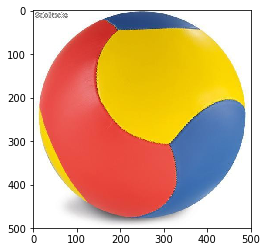

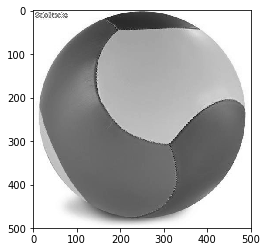

In [3]:
prueba = cv2.imread('pelota.jpg')
prueba = cv2.cvtColor(src=prueba,code=cv2.COLOR_BGR2RGB)
plt.imshow(prueba)
plt.show()

gray = cv2.cvtColor(src=prueba,code=cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.show()

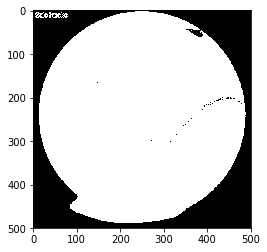

In [4]:
_,thresh = cv2.threshold(gray,215,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,'gray')
plt.show()

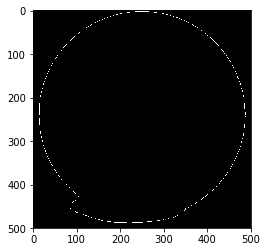

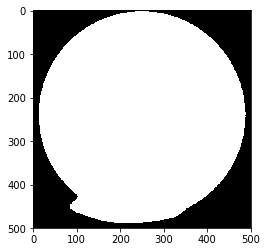

In [5]:
# Extraemos los contornos de la imagen.
_,cont,h = cv2.findContours(thresh,cv2.RETR_TREE,
                           cv2.CHAIN_APPROX_NONE)

# Detectamos el contorno de mayor área.
max_area = 0
for cnt in cont:
    area = cv2.contourArea(cnt)
    if area > max_area:
        max_area = area
        bst_cnt = cnt
        

mask = np.zeros(gray.shape,np.uint8)

mask = cv2.drawContours(mask,[bst_cnt],0,(255,255,255),1)
plt.imshow(mask,'gray')
plt.show()

mask = cv2.drawContours(mask,[bst_cnt],0,(255,255,255),cv2.FILLED)
plt.imshow(mask,'gray')
plt.show()

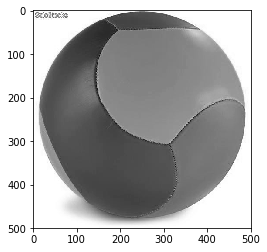

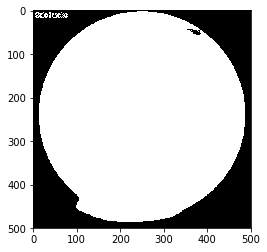

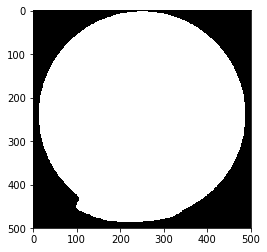

In [6]:
# función para crear una máscara para recortar la imagen.
def extractObjectFromImage(image,threshold=[127,255],type_of_threshold=cv2.THRESH_BINARY):
    # Convertimos la imagen en gris.
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray,'gray')
    plt.show()
    
    # Calculamos el threshold de la imagen.
    _,thresh = cv2.threshold(gray,threshold[0],threshold[1],type_of_threshold)
    plt.imshow(thresh,'gray')
    plt.show()
    
    # Calculamos los contornos a traves de la variable thresh.
    # Nos quedamos con el contorno de mayor área, que será el que contenga toda la imagen.
    # Extraemos los contornos de la imagen.
    _,cont,h = cv2.findContours(thresh,cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_NONE)

    # Detectamos el contorno de mayor área.
    max_area = 0
    for cnt in cont:
        area = cv2.contourArea(cnt)
        if area > max_area:
            max_area = area
            bst_cnt = cnt
            
    # Creamos la máscara.
    mask = np.zeros(gray.shape,np.uint8)
    
    # Introducimos en la máscara el mayor contorno, y rellenamos el espacio que hay dentro.
    mask = cv2.drawContours(mask,[bst_cnt],0,(255,255,255),cv2.FILLED)
    plt.imshow(mask,'gray')
    plt.show()

    # Devolvemos la máscara creada.
    return mask

umbral = [200,255]
mask_prueba = extractObjectFromImage(image=prueba,threshold=umbral,type_of_threshold=cv2.THRESH_BINARY_INV)

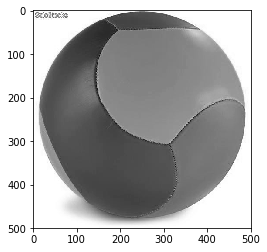

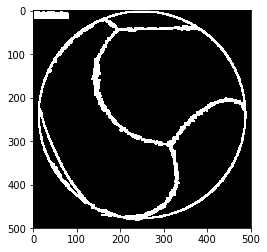

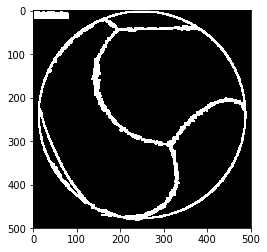

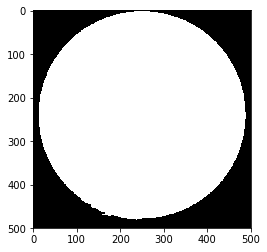

In [7]:
# función para crear una máscara para recortar la imagen.
def extractObjectFromImage(image,threshold=100,type_of_threshold=cv2.THRESH_BINARY):
    # Convertimos la imagen en gris.
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray,'gray')
    plt.show()
    
    # Calculamos las líneas de la imagen.
    canny = cv2.Canny(gray,threshold,threshold*2)
    
    kernel = np.ones((5,5),np.uint8)
    canny = cv2.dilate(canny,kernel)
    plt.imshow(canny,'gray')
    plt.show()
    
    # Calculamos el threshold de la imagen.
    _,thresh = cv2.threshold(canny,0,255,type_of_threshold)
    plt.imshow(thresh,'gray')
    plt.show()
    
    # Calculamos los contornos a traves de la variable thresh.
    # Nos quedamos con el contorno de mayor área, que será el que contenga toda la imagen.
    # Extraemos los contornos de la imagen.
    _,cont,h = cv2.findContours(thresh,cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_NONE)

    # Detectamos el contorno de mayor área.
    max_area = 0
    for cnt in cont:
        area = cv2.contourArea(cnt)
        if area > max_area:
            max_area = area
            bst_cnt = cnt
            
    # Creamos la máscara.
    mask = np.zeros(gray.shape,np.uint8)
    
    # Introducimos en la máscara el mayor contorno, y rellenamos el espacio que hay dentro.
    mask = cv2.drawContours(mask,[bst_cnt],0,(255,255,255),cv2.FILLED)
    mask = cv2.erode(mask,kernel)
    plt.imshow(mask,'gray')
    plt.show()

    # Devolvemos la máscara creada.
    return mask

umbral = 50
mask_prueba = extractObjectFromImage(image=prueba,threshold=umbral)

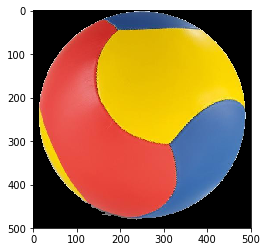

In [8]:
# Ahora obtenemos la imagen recortada.
new_image = prueba.copy()
new_image[np.where(mask_prueba == 0)] = 0
plt.imshow(new_image)
plt.show()

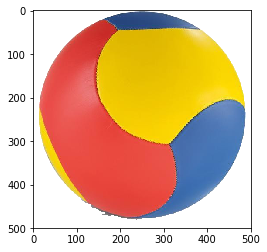

In [9]:
# Ponemos el fondo en transparente para pegarlo en la otra imagen.
new_gray = cv2.cvtColor(new_image,cv2.COLOR_RGB2GRAY)
_,alpha = cv2.threshold(new_gray,0,255,cv2.THRESH_BINARY)
r,g,b = cv2.split(new_image)
rgba = [r,g,b,alpha]
final_image = cv2.merge(rgba,4)
plt.imshow(final_image)
plt.show()

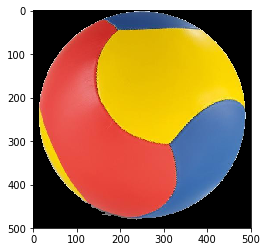

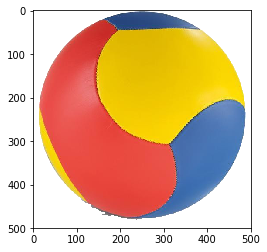

In [10]:
# Función para crear la imagen con el objeto recortado.
# Devuelve una imagen rgba de la imagen sin fondo.
def cropObjectFromImage(mask,image):
    new_image = image.copy()
    
    # Obtenemos la imagen a color con fondo negro.
    new_image[np.where(mask == 0)] = 0
    plt.imshow(new_image)
    plt.show()
    
    # Recortamos el fondo negro y transformamos la imagen.
    new_gray = cv2.cvtColor(new_image,cv2.COLOR_RGB2GRAY)
    _,alpha = cv2.threshold(new_gray,0,255,cv2.THRESH_BINARY)
    # Si la imagen tuviera formato BGR en vez de RGB split devolvería b,g,r.
    r,g,b = cv2.split(new_image)
    rgba = [r,g,b,alpha]
    final_image = cv2.merge(rgba,4)
    plt.imshow(final_image)
    plt.show()
    
    return final_image

pelota = cropObjectFromImage(mask=mask_prueba,image=prueba)

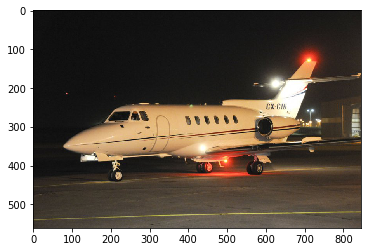

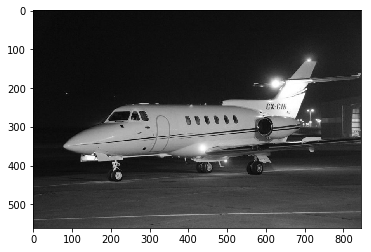

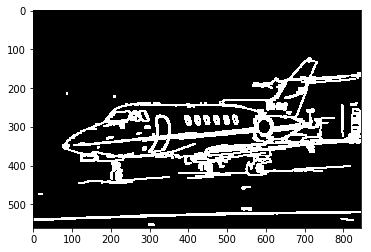

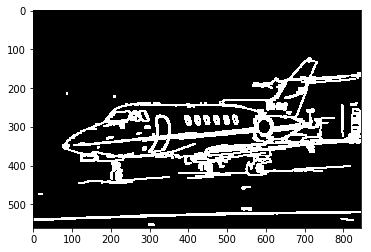

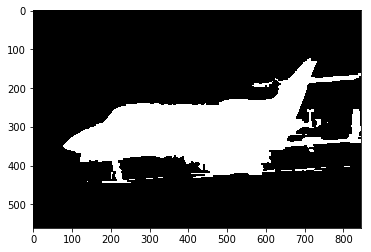

In [11]:
avion = cv2.imread('airplane.jpg')
avion = cv2.cvtColor(src=avion,code=cv2.COLOR_BGR2RGB)
plt.imshow(avion)
plt.show()

umbral = 75
mask_avion = extractObjectFromImage(image=avion,threshold=umbral,type_of_threshold=cv2.THRESH_BINARY)

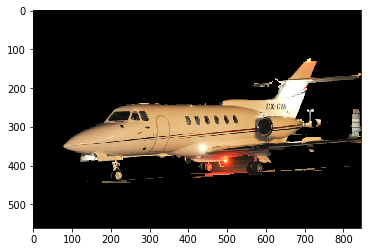

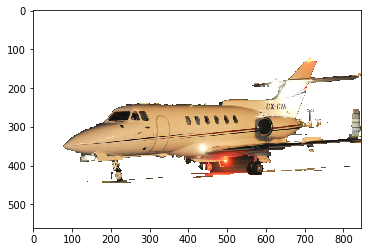

In [12]:
avion_recortado = cropObjectFromImage(mask_avion,avion)

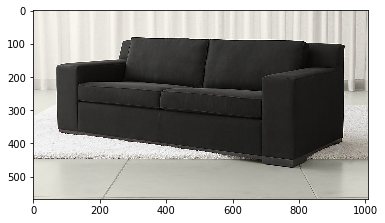

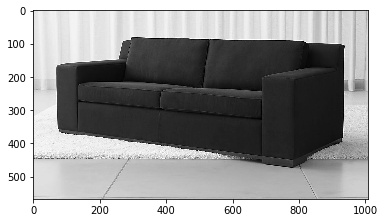

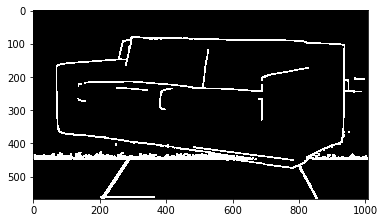

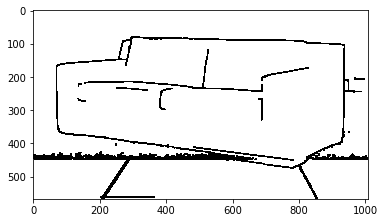

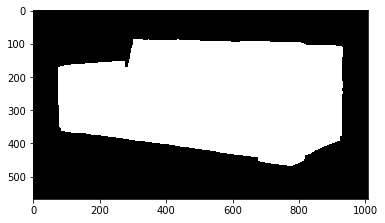

In [13]:
sofa = cv2.imread('sofa.jpg')
sofa = cv2.cvtColor(src=sofa,code=cv2.COLOR_BGR2RGB)
plt.imshow(sofa)
plt.show()

umbral = 150
mask_sofa = extractObjectFromImage(image=sofa,threshold=umbral,type_of_threshold=cv2.THRESH_BINARY_INV)

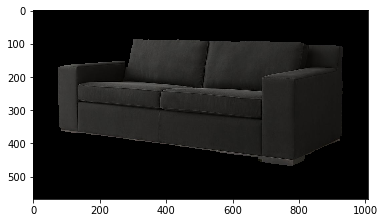

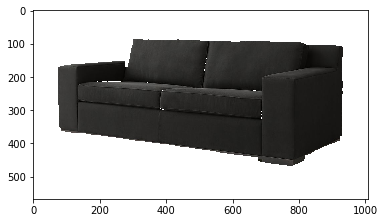

In [14]:
sofa_crop = cropObjectFromImage(image=sofa,mask=mask_sofa)

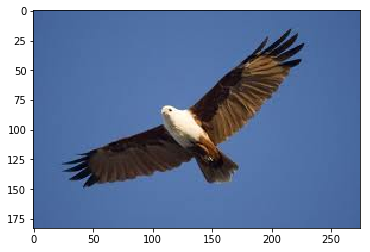

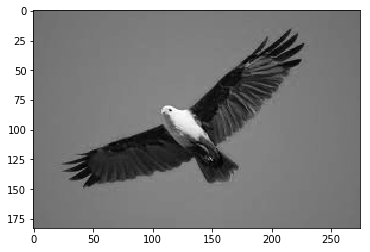

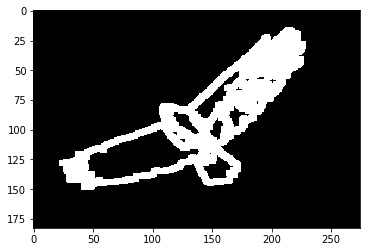

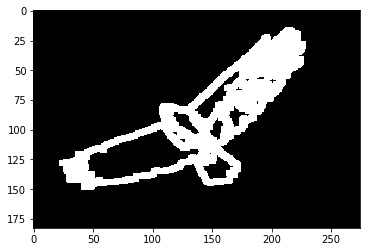

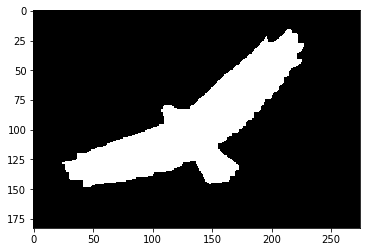

In [15]:
aguila = cv2.imread('aguila.png')
aguila = cv2.cvtColor(src=aguila,code=cv2.COLOR_BGR2RGB)
plt.imshow(aguila)
plt.show()

umbral = 120
mask_aguila = extractObjectFromImage(image=aguila,threshold=umbral)

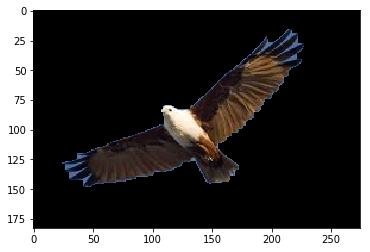

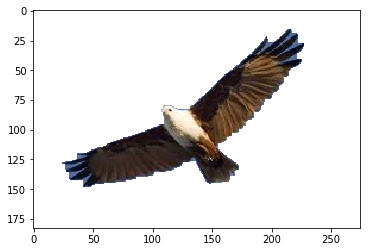

In [16]:
aguila_crop = cropObjectFromImage(image=aguila,mask=mask_aguila)

Como se puede ver, en algunas imágenes se obtienen mejores resultados que en otras, ya que en unas se puede distinguir mejor el objeto del fondo debido a la imagen en blanco y negro.

## Pegado en otras imágenes.
Ahora, pegaremos los objetos recortados en otras imágenes, además, le aplicaremos un filtro guassiano a las imágenes para suavizar la zona donde se ha pegado el objeto e intentar que parezca que no se ha pegado.

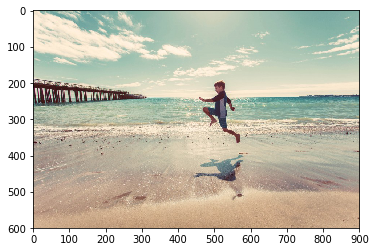

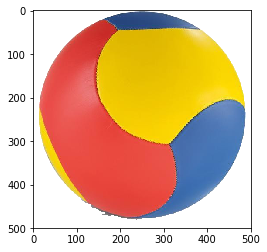

((600, 900, 4), (500, 500, 4))

In [17]:
destino_prueba = cv2.imread('nino_playa.jpg')
destino_prueba = cv2.cvtColor(destino_prueba,cv2.COLOR_BGR2RGBA)
dest = destino_prueba.copy()
plt.imshow(destino_prueba)
plt.show()

plt.imshow(pelota)
plt.show()
destino_prueba.shape , pelota.shape

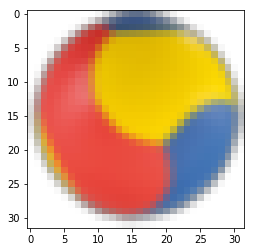

In [18]:
# Reducimos el tamaño de la pelota.
pelota = cv2.pyrDown(pelota) #250x250
pelota = cv2.pyrDown(pelota) #125x125
pelota = cv2.pyrDown(pelota) #62x62
pelota = cv2.pyrDown(pelota)
cols,rows = pelota.shape[:2]
plt.imshow(pelota)
plt.show()

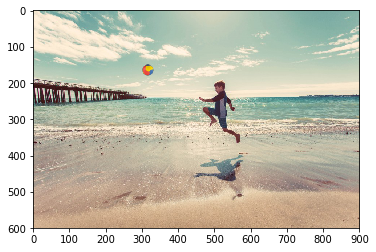

In [19]:
alpha_s = pelota[:,:,3]/255
alpha_b = 1 - alpha_s
pos_ini_x = 300
pos_ini_y = 150
pos_fin_x = pos_ini_x + pelota.shape[1]
pos_fin_y = pos_ini_y + pelota.shape[0]

for i in range(3):
    destino_prueba[pos_ini_y:pos_fin_y, pos_ini_x:pos_fin_x, i] = (alpha_s * pelota[:, :, i] + 
                                                                   alpha_b * destino_prueba[pos_ini_y:pos_fin_y, pos_ini_x:pos_fin_x, i])

plt.imshow(destino_prueba)
plt.savefig("pelota_playa.jpg")
plt.show()

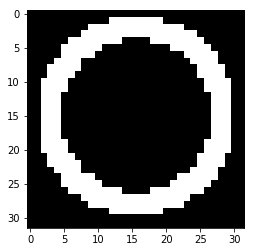

In [20]:
def createMaskForBlurImage(alpha_mask,width=2):
    # Transformarmos la máscara a np.uint8 por si no lo fuera.
    gray_mask = np.array(alpha_mask,np.uint8)
    
    # Utilizamos la función find contours para obtener el contorno solamente.
    _,cont,h = cv2.findContours(gray_mask,cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_NONE)
    
    # Detectamos el contorno de mayor área.
    max_area = 0
    for cnt in cont:
        area = cv2.contourArea(cnt)
        if area > max_area:
            max_area = area
            bst_cnt = cnt
            
    blur_mask = np.zeros(gray_mask.shape,np.uint8)
    blur_mask = cv2.drawContours(blur_mask,[bst_cnt],0,(255,255,255),width)
    
    return blur_mask

mask_prueba = createMaskForBlurImage(alpha_s)
plt.imshow(mask_prueba,'gray')
plt.show()
    

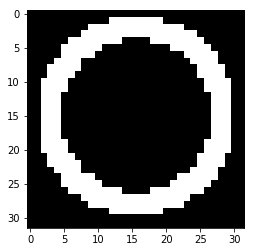

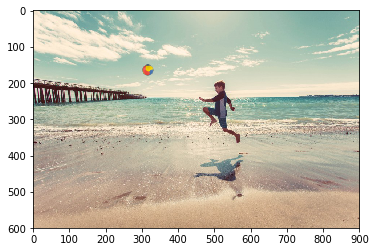

True

In [21]:
def pasteImage(src, dst, pos=[],width=2):
    # Calculamos zonas donde la imagen src aparece.
    alpha_s = src[:,:,3]/255
    alpha_d = 1-alpha_s
    
    dst_r = dst.copy()
    
    # Calculamos la zona donde pegaremos la imagen.
    x_ini = pos[1]
    y_ini = pos[0]
    x_fin = x_ini + src.shape[1]
    y_fin = y_ini + src.shape[0]
    
    # Pegamos la imagen. R.G.B
    for color in range(3):
        dst_r[y_ini:y_fin,x_ini:x_fin,color] = (alpha_s*src[:,:,color] + alpha_d*dst_r[y_ini:y_fin,x_ini:x_fin,color])
        
    kernel_size = 5
    blur = cv2.GaussianBlur(dst_r,(kernel_size,kernel_size),0)
    
    blur_mask = createMaskForBlurImage(alpha_s,width=width)
    plt.imshow(blur_mask,'gray')
    plt.show()
    
    rows,cols = blur_mask.shape
    for color in range(3):
        for y in range(rows):
            for x in range(cols):
                if(blur_mask[y,x] == 255):
                    dst_r[y+y_ini,x+x_ini] = blur[y+y_ini,x+x_ini]
                
                                        
    
    return dst_r

fin_img = pasteImage(pelota,dest,[150,300])
plt.imshow(fin_img)
plt.show()
cv2.imwrite("p1.jpg",cv2.cvtColor(fin_img,cv2.COLOR_RGBA2BGR) )


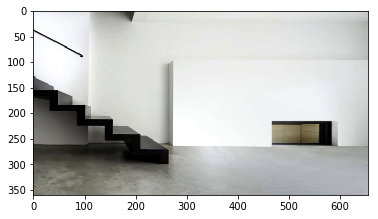

In [22]:
salon = cv2.imread('salon2.jpg')
salon = cv2.cvtColor(salon, cv2.COLOR_BGR2RGBA)
plt.imshow(salon)
plt.show()

In [23]:
sofa_crop.shape , salon.shape

((567, 1008, 4), (360, 655, 4))

In [24]:
sofa_crop = cv2.pyrDown(sofa_crop)
sofa_crop = cv2.pyrDown(sofa_crop)
sofa_crop.shape

(142, 252, 4)

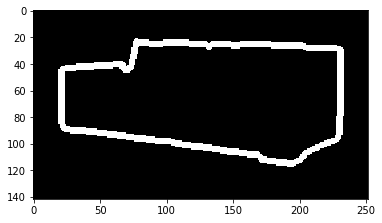

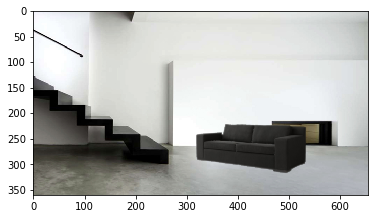

True

In [25]:
fin_img = pasteImage(sofa_crop,salon,[200,300],width=3)
plt.imshow(fin_img)
plt.show()
cv2.imwrite('p2.jpg',cv2.cvtColor(fin_img,cv2.COLOR_RGBA2BGR) )

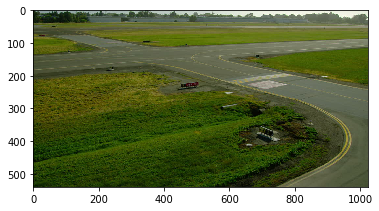

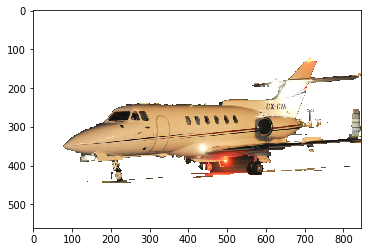

In [26]:
pista_at = cv2.imread('pista.jpg')
pista_at = cv2.cvtColor(pista_at,cv2.COLOR_BGR2RGB)
plt.imshow(pista_at)
plt.show()
plt.imshow(avion_recortado)
plt.show()

In [27]:
avion_recortado = cv2.pyrDown(avion_recortado)
avion_recortado = cv2.pyrDown(avion_recortado)

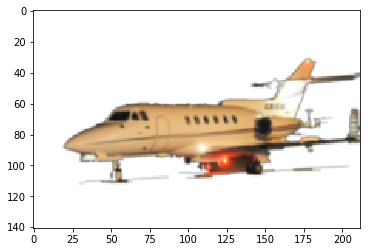

In [28]:
plt.imshow(avion_recortado)
plt.show()

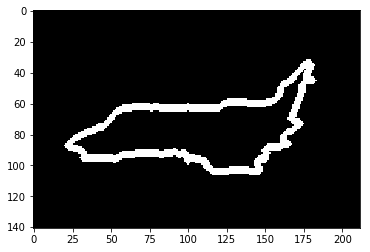

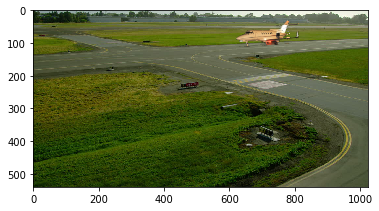

True

In [29]:
final_img = pasteImage(avion_recortado,pista_at,[0,600],3)
plt.imshow(final_img)
plt.show()
cv2.imwrite('p3.jpg',cv2.cvtColor(final_img,cv2.COLOR_RGBA2BGR) )

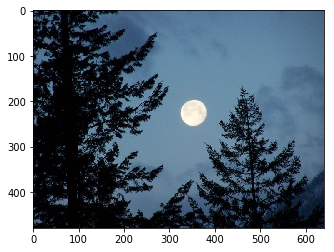

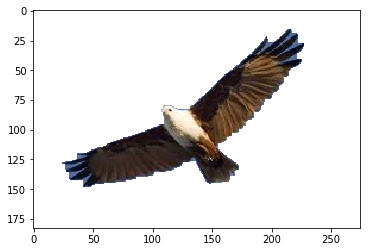

In [30]:
bosque_noche = cv2.imread('destino1.png')
bosque_noche = cv2.cvtColor(bosque_noche,cv2.COLOR_BGR2RGB)
plt.imshow(bosque_noche)
plt.show()
plt.imshow(aguila_crop)
plt.show()

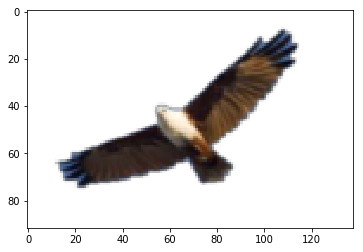

((92, 138, 4), (479, 640, 3))

In [31]:
aguila_crop = cv2.pyrDown(aguila_crop)
plt.imshow(aguila_crop)
plt.show()

aguila_crop.shape, bosque_noche.shape

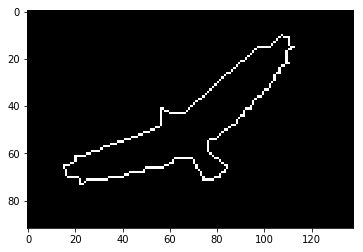

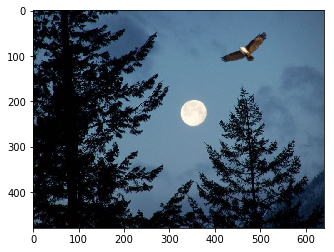

True

In [32]:
final_img = pasteImage(aguila_crop,bosque_noche,[40,400],1)
plt.imshow(final_img)
plt.show()
cv2.imwrite('p4.jpg',cv2.cvtColor(final_img,cv2.COLOR_RGBA2BGR))

## Posible mejora en el pegado de la imagen.

Como se puede ver, los resultados varian en la calidad, cuando más grande es el objeto que se pega en la imagen más fácil es notar que el objeto no pertenece a esa imagen. Por lo cuál, en vez de utilizar un simple filtro de alisado en los bordes del objeto que estamos pegando y alrededores, se va a utilizar las pirámides guassianas y laplaciana para internar hacer un blending de ambas imágenes de mejor calidad.

In [33]:
# Función para crear una pirámide gaussiana de N niveles.
def createGaussianPyr(image,n_levels=2):
    # La imagen original va a contar como el nivel inicial de la pirámide.
    img = image.copy()
    # pyr será nuestra pirámide gaussiana.
    pyr = [img]
    
    # creamos cada uno de los niveles de nuestra pirámide.
    for i in range(n_levels-1):
        img = cv2.pyrDown(img)
        pyr.append(img)
    
    # Devolvemos la pirámide gaussina.
    return pyr

# Función para crear una pirámide laplaciana, a partir de una pirámide gaussiana.
def createLaplacianPyr(gaussianPyr):
    lastIt = len(gaussianPyr)-1
    # Insertamos el último nivel de la pirámide gaussiana en la pirámide.
    lapPyr = [gaussianPyr[lastIt]]
    
    for i in range(lastIt,0,-1):
        size = gaussianPyr[i-1].shape[:2]
        img = cv2.pyrUp(gaussianPyr[i],dstsize=(size[1],size[0]) )
        L = cv2.subtract(gaussianPyr[i-1],img)
        lapPyr.append(L)
    
    return lapPyr

x_ini = 400
y_ini = 40
x_fin = x_ini + aguila_crop.shape[1]
y_fin = y_ini + aguila_crop.shape[0]

# Función para obtener una máscara con la forma del objeto que vamos a pegar.
def obtainMask(img):
    mask = img[:,:,3]/255
    
    return mask

mask = obtainMask(aguila_crop)

b_pyr = createGaussianPyr(bosque_noche[y_ini:y_fin,x_ini:x_fin,:])
l_pyr = createLaplacianPyr(b_pyr)
a_pyr = createGaussianPyr(aguila_crop)
a_lPyr = createLaplacianPyr(a_pyr)
mask_pyr = createGaussianPyr(mask)


In [34]:
def simplePasteImage(src, dst,mask):
    # Calculamos zonas donde la imagen src aparece.
    alpha_d = 1-mask
    
    dst_r = dst.copy()
    
    # Pegamos la imagen. R.G.B
    for color in range(3):
        dst_r[:,:,color] = (mask*src[:,:,color] + alpha_d*dst_r[:,:,color])
    
    return dst_r

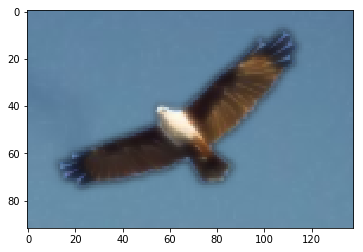

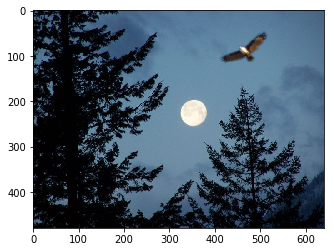

True

In [35]:
def createPastePyramid(lPsrc,lPdst,maskPyr):
    LS = []
    lastPos = len(maskPyr)-1
    
    # Recorremos ambas pirámides y vamos pegando el objeto dentro de cada imagen.
    for la,lb in zip(lPsrc,lPdst):
        ls = simplePasteImage(la,lb,maskPyr[lastPos])
        LS.append(ls)
        lastPos = lastPos - 1
        
    return LS

def reconstructFromPyramid(laplaceCombinated):
    final_construction = laplaceCombinated[0]
    
    for i in range(1,len(laplaceCombinated)):
        size = laplaceCombinated[i].shape[:2]
        final_construction = cv2.pyrUp(final_construction,dstsize=(size[1],size[0]) )
        final_construction = cv2.add(final_construction,laplaceCombinated[i])
    
    return final_construction
        
comb = createPastePyramid(a_lPyr,l_pyr,mask_pyr)
fin = reconstructFromPyramid(comb)
plt.imshow(fin)
plt.show()

bosque_noche[y_ini:y_fin,x_ini:x_fin,:] = fin
plt.imshow(bosque_noche)
plt.show()
cv2.imwrite('otro_intento_aguila.jpg',cv2.cvtColor(bosque_noche,cv2.COLOR_RGBA2BGR))

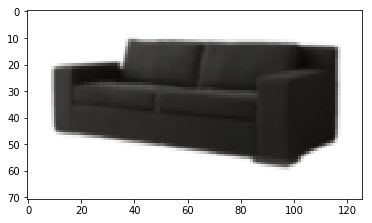

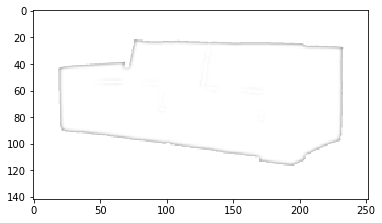

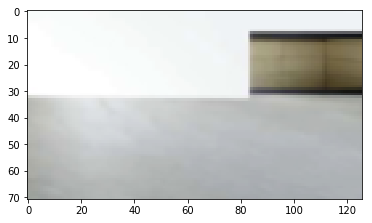

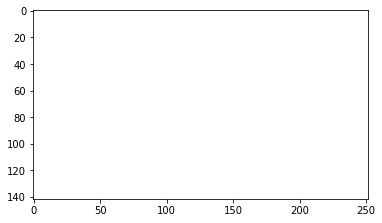

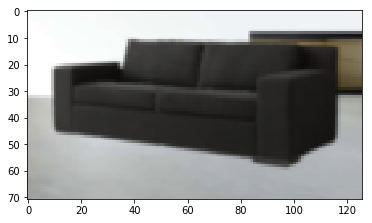

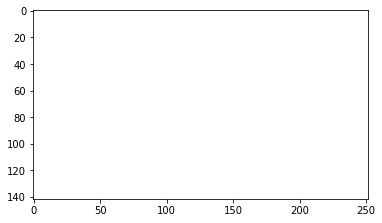

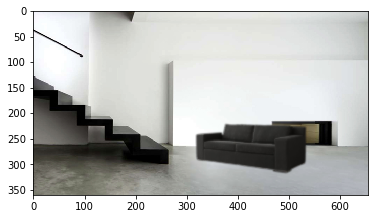

True

In [36]:
def pasteImage2(src,dst,pos=[]):
    x_ini = pos[1]
    y_ini = pos[0]
    x_fin = src.shape[1]+x_ini
    y_fin = src.shape[0]+y_ini
    
    mask = obtainMask(src)
    mask_pyr = createGaussianPyr(mask)
    
    laplacianSrc = createLaplacianPyr(createGaussianPyr(src))
    for i in laplacianSrc:
        plt.imshow(i)
        plt.show()
    laplacianDst = createLaplacianPyr(createGaussianPyr(dst[y_ini:y_fin,x_ini:x_fin,:]))
    for i in laplacianDst:
        plt.imshow(i)
        plt.show()
    comb = createPastePyramid(laplacianSrc,laplacianDst,mask_pyr)
    
    for i in comb:
        plt.imshow(i)
        plt.show()
    
    result = reconstructFromPyramid(comb)
    
    dst_r = dst.copy()
    
    dst_r[y_ini:y_fin,x_ini:x_fin,:] = result
    
    return dst_r
    
ej = pasteImage2(sofa_crop,salon,[200,300])
plt.imshow(ej)
plt.show()
cv2.imwrite('otro_intento_sofa.png',cv2.cvtColor(ej,cv2.COLOR_RGBA2BGR) )

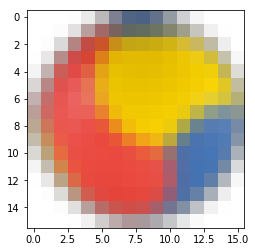

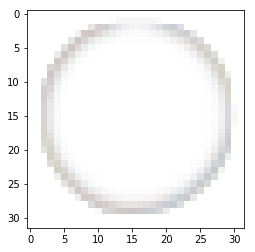

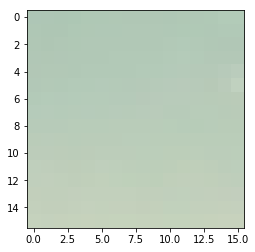

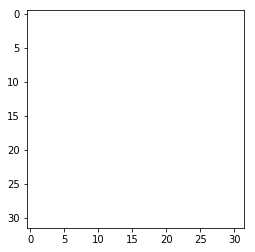

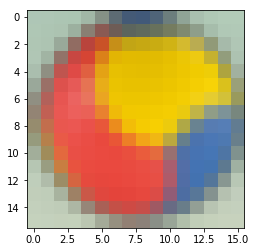

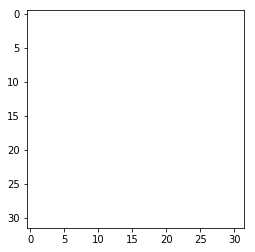

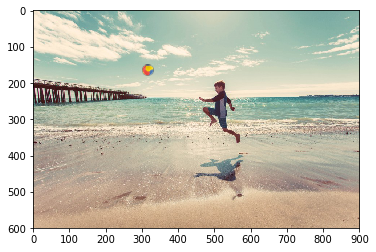

True

In [37]:
ej = pasteImage2(pelota,dest,[150,300])
plt.imshow(ej)
plt.show()
cv2.imwrite('otro_intento_pelota.jpg',cv2.cvtColor(ej,cv2.COLOR_RGBA2BGR) )

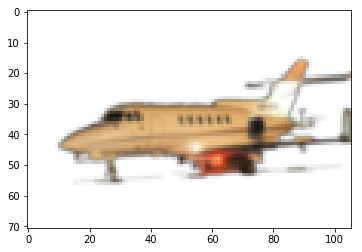

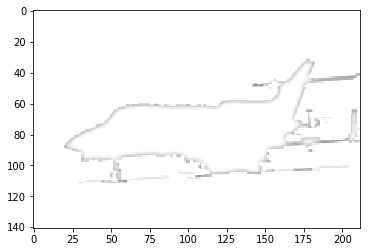

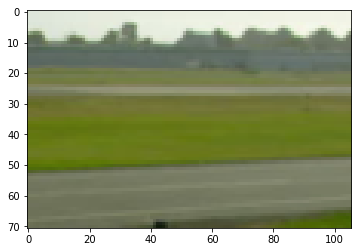

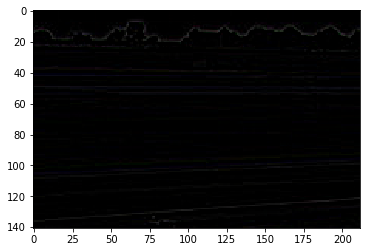

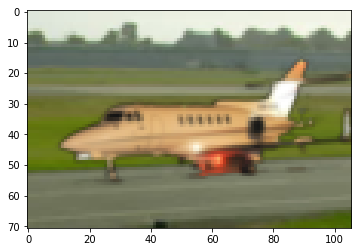

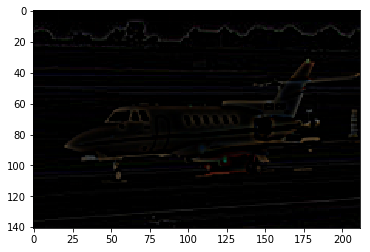

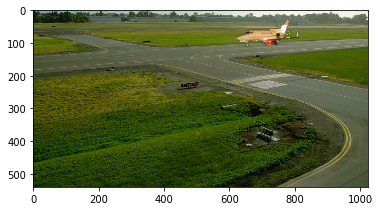

True

In [38]:
final_img = pasteImage2(avion_recortado,pista_at,[0,600])
plt.imshow(final_img)
plt.show()
cv2.imwrite('otro_intento_avion.jpg',cv2.cvtColor(final_img,cv2.COLOR_RGBA2BGR) )